In [1]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
# gpu를 사용할때 device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/Users/kkyuhun/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [6]:
# MNIST data image of shape 28 * 28 = 784
# input 784, output 10 , bias True 
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax는 토치에서 내부적으로 계산함
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534912467
Epoch: 0002 cost = 0.359308660
Epoch: 0003 cost = 0.331088185
Epoch: 0004 cost = 0.316574216
Epoch: 0005 cost = 0.307130307
Epoch: 0006 cost = 0.300207913
Epoch: 0007 cost = 0.294897258
Epoch: 0008 cost = 0.290830433
Epoch: 0009 cost = 0.287419558
Epoch: 0010 cost = 0.284588993
Epoch: 0011 cost = 0.281816244
Epoch: 0012 cost = 0.279919624
Epoch: 0013 cost = 0.277836829
Epoch: 0014 cost = 0.276022315
Epoch: 0015 cost = 0.274443209
Learning finished


Accuracy: 0.8867999911308289
Label:  5
Prediction:  8


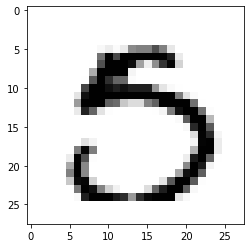

In [17]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict : 랜덤으로 하나를 잡고 예측 해보기 
    r = random.randint(0, len(mnist_test) - 1) # 0~mnizst_test셋 중 하나의 인덱스 선택
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device) # 인덱스 하나 추출
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device) # 해당 예측값 라벨 추출 

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()